# Floor detection from label images

---

**Author:** [rodoart](https://github.com/rodoart/)<br>
**Date created:** 2021/08/06<br>
**Last modified:** 2021/08/05<br>
**Description:** 
Using segmented images automatically the floor is detected.


In [2]:
TYPE_OF_EXECUTION = 'colab'
# Options: 'alone' or 'normal'

## Libraries

In [3]:
import sys
import subprocess
import pkg_resources

required = {
    'dvc', 'dvc[gdrive]', 'gdown'
}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)


## Download repository files

### GitHub

If you want to make `push` with GitHub you will need to make an rsa key and register it in the website. 

In [73]:
GITHUB_PULL_NEEDED = True

In [74]:
from os import chdir

In [75]:
if TYPE_OF_EXECUTION in ('alone', 'colab') and GITHUB_PULL_NEEDED:
  # The created key is moved to the folder where it is required.
  !mkdir -p /root/.ssh/
  !cp /content/id_rsa.pub /root/.ssh/id_rsa.pub 
  !cp /content/id_rsa /root/.ssh/id_rsa 
  # Permissions change for more security.
  !chmod 600 ~/.ssh/id_rsa
  !chmod 600 ~/.ssh/id_rsa.pub
  # Associate the key to GitHub.com
  !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

  # Change them to your credentials.
  !git config --global user.email "rodoart@ciencias.unam.mx"
  !git config --global user.name "rodoart"

  # Clone the repo.
  !git clone git@github.com:rodoart/pet-surveillance.git

  # Change the remote to your branch.
  chdir('pet-surveillance')
  !git remote remove origin
  !git remote add origin git@github.com:rodoart/pet-surveillance.git

elif TYPE_OF_EXECUTION in ('alone', 'colab'):
  !git clone https://github.com/rodoart/pet-surveillance
  chdir('pet-surveillance')

else:
  chdir('..')



# github.com:22 SSH-2.0-babeld-831dd33d
Cloning into 'pet-surveillance'...
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 362 (delta 153), reused 326 (delta 117), pack-reused 0
Receiving objects: 100% (362/362), 9.81 MiB | 25.82 MiB/s, done.
^C


FileNotFoundError: ignored

### Path function

In [ ]:
import sys
sys.path.append('.')

In [ ]:
from pet_surveillance.utils.paths import make_dir_function, is_valid

In [ ]:
local_dir = make_dir_function()

### DVC

Note: the function will ask for access in the browser, you have to click on the link, authorize DVC to use Google Drive and copy the code.


In [ ]:
predicted_data_set_path = local_dir('data','processed', 'semantic_segmentation', 
                                    'unity_residential_interiors', 
                                    'segformer_predicted_val_images')

In [ ]:
!dvc pull $predicted_data_set_path

## Load images

In [14]:
from os import listdir

In [20]:
image_names = [name[:-4] for name in listdir(predicted_data_set_path) if name.endswith('.png')]

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

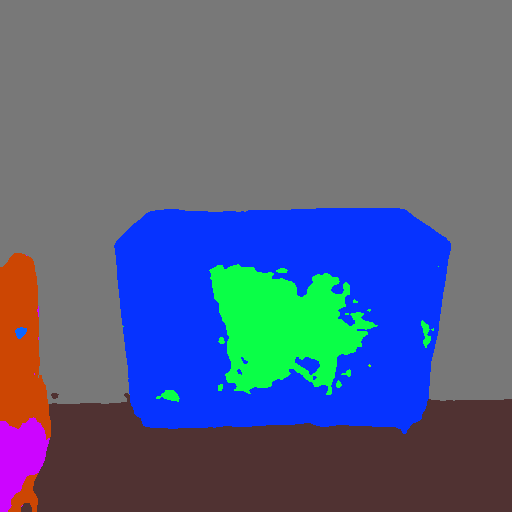

In [27]:
img = Image.open(predicted_data_set_path.joinpath(f'{image_names[13]}.png'))
img

In [30]:
arr_img = np.asarray(img)

(-0.5, 7.5, 0.5, -0.5)

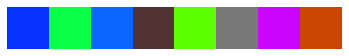

In [50]:
colors = np.unique(arr_img.reshape(-1, arr_img.shape[2]), axis=0)
plt.imshow(np.array(colors)[np.newaxis, :, :])
plt.axis('off')

In [55]:
floor_color = colors[3]

In [57]:
indices = np.where(np.all(arr_img == floor_color, axis=-1))
indices

(array([393, 393, 393, ..., 511, 511, 511]),
 array([ 52,  53,  54, ..., 509, 510, 511]))

In [70]:
mask = np.zeros(arr_img.shape[:-1], bool)

In [71]:
mask[indices] = True

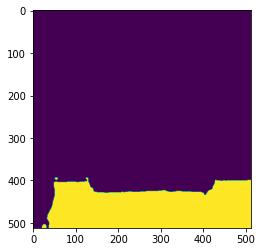

In [72]:
plt.imshow(mask)

## Syncing files to DVC and GitHub

In [ ]:
!dvc add $predicted_labels_path

⠸ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
Computing file/dir hashes (only done once)          |0.00 [00:00,      ?md5/s]
Computing file/dir hashes (only done once)          |85.0 [00:00,    843md5/s]
Computing file/dir hashes (only done once)          |188 [00:00,    834md5/s] 
Computing file/dir hashes (only done once)          |285 [00:00,    889md5/s]
                                                                             
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s]
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s{'info': ''}]
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s{'info': ''}]
                                                                               
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Transferring:   0% 0/301 [00:00<?, ?file/s]
Transferring:   0% 0/301 [00:00<?, ?file/s{'info': ''}]
Transferring:  28% 85/301 [00:00<00:00,

In [ ]:
!git add data/processed/semantic_segmentation/unity_residential_interiors/segformer_predicted_val_images.dvc data/processed/semantic_segmentation/unity_residential_interiors/.gitignore


In [ ]:
!git pull

Already up to date.


In [ ]:
!git push origin master

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (8/8), 920 bytes | 920.00 KiB/s, done.
Total 8 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:rodoart/pet-surveillance.git
   b4290aa..a1646e2  master -> master


In [ ]:
!dvc push

Se truncaron las últimas líneas 5000 del resultado de transmisión.
100% 7.05k/7.05k [00:00<00:00, 24.3kB/s{'info': ''}]                       


!


  0%|          |a40f80e52dec503e2b11c15ec035fe     0.00/? [00:00<?,        ?B/s]


a40f80e52dec503e2b11c15ec035fe:   0% 0.00/4.61k [00:00<?, ?B/s{'info': ''}]     






Transferring:  22% 67/301 [00:14<00:52,  4.43file/s{'info': ''}]



                                                    

                                                    


100% 4.61k/4.61k [00:00<00:00, 24.9kB/s{'info': ''}]                       

!

  0%|          |69c4b752017fd6c2ebf47b737d94fb     0.00/? [00:00<?,        ?B/s]

69c4b752017fd6c2ebf47b737d94fb:   0% 0.00/3.12k [00:00<?, ?B/s{'info': ''}]     



!



  0%|          |0eaffa69cf71c1731934cbe12c14bf     0.00/? [00:00<?,        ?B/s]



0eaffa69cf71c1731934cbe12c14bf:   0% 0.00/5.49k [00:00<?, ?B/s{'info': ''}]     




Transferring:  23% 70/301 [00:14<00:39,  5.80file/s{'info': ''}]

100% 3.12k/3.12k [